In [4]:
!pip install kaggle

In [9]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')


In [8]:
!kaggle datasets download -d kazanova/sentiment140


Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other




  0%|          | 0.00/80.9M [00:00<?, ?B/s]
  1%|          | 1.00M/80.9M [00:01<02:03, 677kB/s]
  2%|▏         | 2.00M/80.9M [00:01<01:02, 1.32MB/s]
  4%|▎         | 3.00M/80.9M [00:02<00:43, 1.87MB/s]
  5%|▍         | 4.00M/80.9M [00:02<00:34, 2.32MB/s]
  6%|▌         | 5.00M/80.9M [00:02<00:29, 2.72MB/s]
  7%|▋         | 6.00M/80.9M [00:02<00:26, 2.95MB/s]
  9%|▊         | 7.00M/80.9M [00:03<00:24, 3.21MB/s]
 10%|▉         | 8.00M/80.9M [00:03<00:22, 3.35MB/s]
 11%|█         | 9.00M/80.9M [00:03<00:21, 3.48MB/s]
 12%|█▏        | 10.0M/80.9M [00:04<00:21, 3.46MB/s]
 14%|█▎        | 11.0M/80.9M [00:04<00:21, 3.47MB/s]
 15%|█▍        | 12.0M/80.9M [00:04<00:20, 3.54MB/s]
 16%|█▌        | 13.0M/80.9M [00:04<00:20, 3.55MB/s]
 17%|█▋        | 14.0M/80.9M [00:05<00:18, 3.72MB/s]
 19%|█▊        | 15.0M/80.9M [00:05<00:18, 3.76MB/s]
 20%|█▉        | 16.0M/80.9M [00:05<00:18, 3.74MB/s]
 21%|██        | 17.0M/80.9M [00:06<00:18, 3.60MB/s]
 22%|██▏       | 18.0M/80.9M [00:06<00:18, 3.53MB/s]
 2

In [10]:
import zipfile

zip_file_path = 'sentiment140.zip'

# Specify the directory where you want to extract the files
extract_dir = 'D:\Projects\PROJECTS\Twitter Sentiment Analysis'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into the specified directory
    zip_ref.extractall(extract_dir)


In [60]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

In [61]:
df=pd.read_csv('training.1600000.processed.noemoticon.csv',names=['target','id','date','flag','user','text'],encoding = 'latin1')
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [62]:
# Checking the shape of dataset 
df.shape

(1600000, 6)

In [63]:
# Checking for missing value
df.isna().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [64]:
# Checking for duplicate
df.duplicated().sum()

0

In [65]:
# Explore column data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [66]:
# Display sample tweets to understand the data
print("\nSample tweets:")
for i, tweet in enumerate(df['text'].sample(5), 1):
    print(f"{i}. {tweet}")


Sample tweets:
1. @djmoflava Yeah, I didn't wanna go 2 bed w/o fixing this shit but it don't look like itz gonna be fixed 2nite  Sucks! Bout 2 be out tho..
2. Did anyone here the mega thunder in  London this morn??! My bed shook! No Portobello  my friend asked if I was allergic to rain...er Yes!
3. Sagie thought she was gonna die. Poor thing  she was very very ouchie in her tummy
4. @GQBugs  so stressed  i rather it downtown
5. I feel like this is decadent music  â« http://blip.fm/~8bc0g


In [67]:
# Display target distribution
df['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [68]:
# Display date range
print("\nDate range:")
print("Min Date:", df['date'].min())
print("Max Date:", df['date'].max())


Date range:
Min Date: Fri Apr 17 20:30:31 PDT 2009
Max Date: Wed May 27 07:27:38 PDT 2009


In [69]:
# Drop unnecessary columns
df=df.drop(['id','date','flag','user'],axis=1)
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [70]:
#Converting target column {0:Negative,1:Positive}
df['target']=df['target'].map({0:0,4:1})

In [71]:
def preprocess_text(text):
    # Remove special characters, URLs, and usernames
    text=re.sub('[^a-zA-Z]',' ',text)
    text = re.sub(r'http\S+|www\S+|@[^\s]+', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

In [72]:
df['text'] = df['text'].apply(preprocess_text)

In [73]:
df.head()

,target,text
0,0,switchfoot http twitpic com zl awww bummer sho...
1,0,upset update facebook texting might cry result...
2,0,kenichan dived many time ball managed save res...
3,0,whole body feel itchy like fire
4,0,nationwideclass behaving mad see


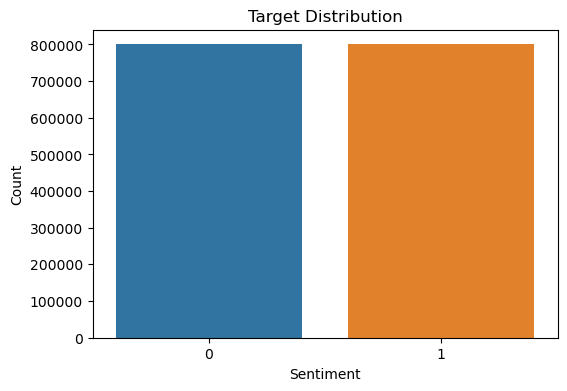

In [74]:
# Display target distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target')
plt.title("Target Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

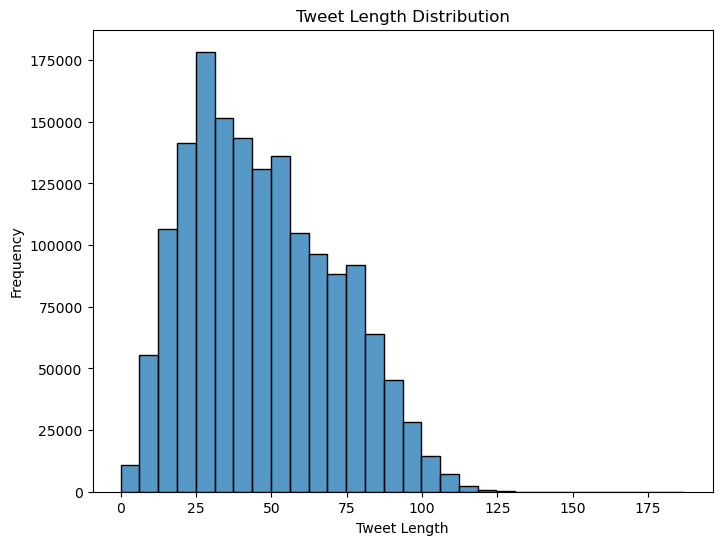

In [75]:
# Display tweet length distribution
df['tweet_length'] = df['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='tweet_length', bins=30)
plt.title("Tweet Length Distribution")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()

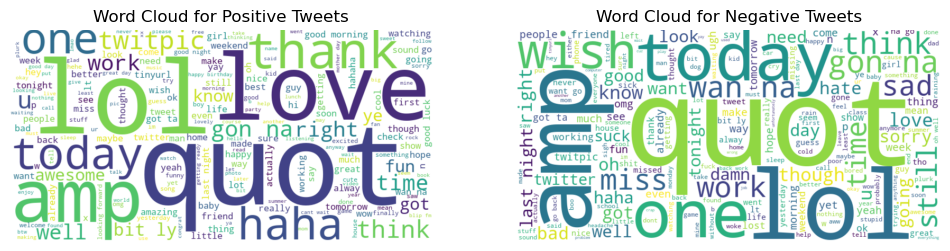

In [76]:
# Display word cloud for positive and negative tweets
positive_tweets = ' '.join(df[df['target'] == 1]['text'])
negative_tweets = ' '.join(df[df['target'] == 0]['text'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Word Cloud for Positive Tweets")
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Word Cloud for Negative Tweets")
plt.axis('off')

plt.show()

In [77]:
# Split the dataset into Feature and Target
X=df['text']
y=df['target']

In [78]:
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

In [79]:
# List of model to compare
models = [
    ("Naive Bayes", MultinomialNB(), {'clf__alpha': [0.1, 0.5, 1.0]}),
    ("Logistic Regression", LogisticRegression(max_iter=1000), {'clf__C': [0.1, 1, 10]}),
    ("Support Vector Machine", LinearSVC(), {'clf__C': [0.1, 1, 10]})
]

In [80]:
for name,model,param_grid in models:
    pipeline=Pipeline([('tfidf',TfidfVectorizer(max_features=5000)),
                       ('clf',model)])
    
    grid_search=GridSearchCV(pipeline,param_grid,cv=5,scoring='accuracy')

    grid_search.fit(X_train,y_train)
    
    best_model=grid_search.best_estimator_

    y_pred=best_model.predict(X_test)

    accuracy=accuracy_score(y_test,y_pred)

    print(f'Model:{name}')
    print(f'Param:{grid_search.best_params_}')
    print(f'Cross-Validation Accuracy: {grid_search.best_score_}')
    print(f'Accuracy : {accuracy}')
    print(f'Classification Report : \n {classification_report(y_test,y_pred)}')
    print('='*50)

Model:Naive Bayes
Param:{'clf__alpha': 1.0}
Cross-Validation Accuracy: 0.7539358333333332
Accuracy : 0.75424
Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.76      0.76    200000
           1       0.76      0.75      0.75    200000

    accuracy                           0.75    400000
   macro avg       0.75      0.75      0.75    400000
weighted avg       0.75      0.75      0.75    400000

Model:Logistic Regression
Param:{'clf__C': 1}
Cross-Validation Accuracy: 0.76868
Accuracy : 0.769605
Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.75      0.76    200000
           1       0.76      0.79      0.77    200000

    accuracy                           0.77    400000
   macro avg       0.77      0.77      0.77    400000
weighted avg       0.77      0.77      0.77    400000

Model:Support Vector Machine
Param:{'clf__C': 0.1}
Cross-Validation Accuracy: 0.7680

In [82]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000, C=1))
])


# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Save the model and vectorizer
joblib.dump(pipeline, 'sentiment_model.pkl')

['sentiment_model.pkl']

In [83]:
X_new=X_test.iloc[300]
print(y_test.iloc[300])

1


In [88]:
# Load the saved model
saved_model = joblib.load('sentiment_model.pkl')

# Make predictions
predictions = saved_model.predict([X_new])

# Print the prediction
print("Predicted sentiment:",'Positive' if predictions[0]==1 else 'Negative' )


Predicted sentiment: Positive


In [89]:
new_text = 'today is the best day'
predictions = saved_model.predict([new_text])

# Print the prediction
print("Predicted sentiment:",'Positive' if predictions[0]==1 else 'Negative' )

Predicted sentiment: Positive
